In [123]:
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv('C:\\Users\\Almas\\Downloads/winequality-red.csv')

In [125]:
df.head(1000)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.4              0.70         0.00            1.90      0.076   
1              7.8              0.88         0.00            2.60      0.098   
2              7.8              0.76         0.04            2.30      0.092   
3             11.2              0.28         0.56            1.90      0.075   
4              7.4              0.70         0.00            1.90      0.076   
..             ...               ...          ...             ...        ...   
995            7.7              0.60         0.06            2.00      0.079   
996            5.6              0.66         0.00            2.20      0.087   
997            5.6              0.66         0.00            2.20      0.087   
998            8.9              0.84         0.34            1.40      0.050   
999            6.4              0.69         0.00            1.65      0.055   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11.0                  34.0  0.99780  3.51       0.56   
1                   25.0                  67.0  0.99680  3.20       0.68   
2                   15.0                  54.0  0.99700  3.26       0.65   
3                   17.0                  60.0  0.99800  3.16       0.58   
4                   11.0                  34.0  0.99780  3.51       0.56   
..                   ...                   ...      ...   ...        ...   
995                 19.0                  41.0  0.99697  3.39       0.62   
996                  3.0                  11.0  0.99378  3.71       0.63   
997                  3.0                  11.0  0.99378  3.71       0.63   
998                  4.0                  10.0  0.99554  3.12       0.48   
999                  7.0                  12.0  0.99162  3.47       0.53   

     alcohol  quality  
0        9.4        5  
1        9.8        5  
2        9.8        5  
3        9.8        6  
4        9.4        5  
..       ...      ...  
995     10.1        6  
996     12.8        7  
997     12.8        7  
998      9.1        6  
999     12.9        6  

[1000 rows x 12 columns]

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [127]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [128]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

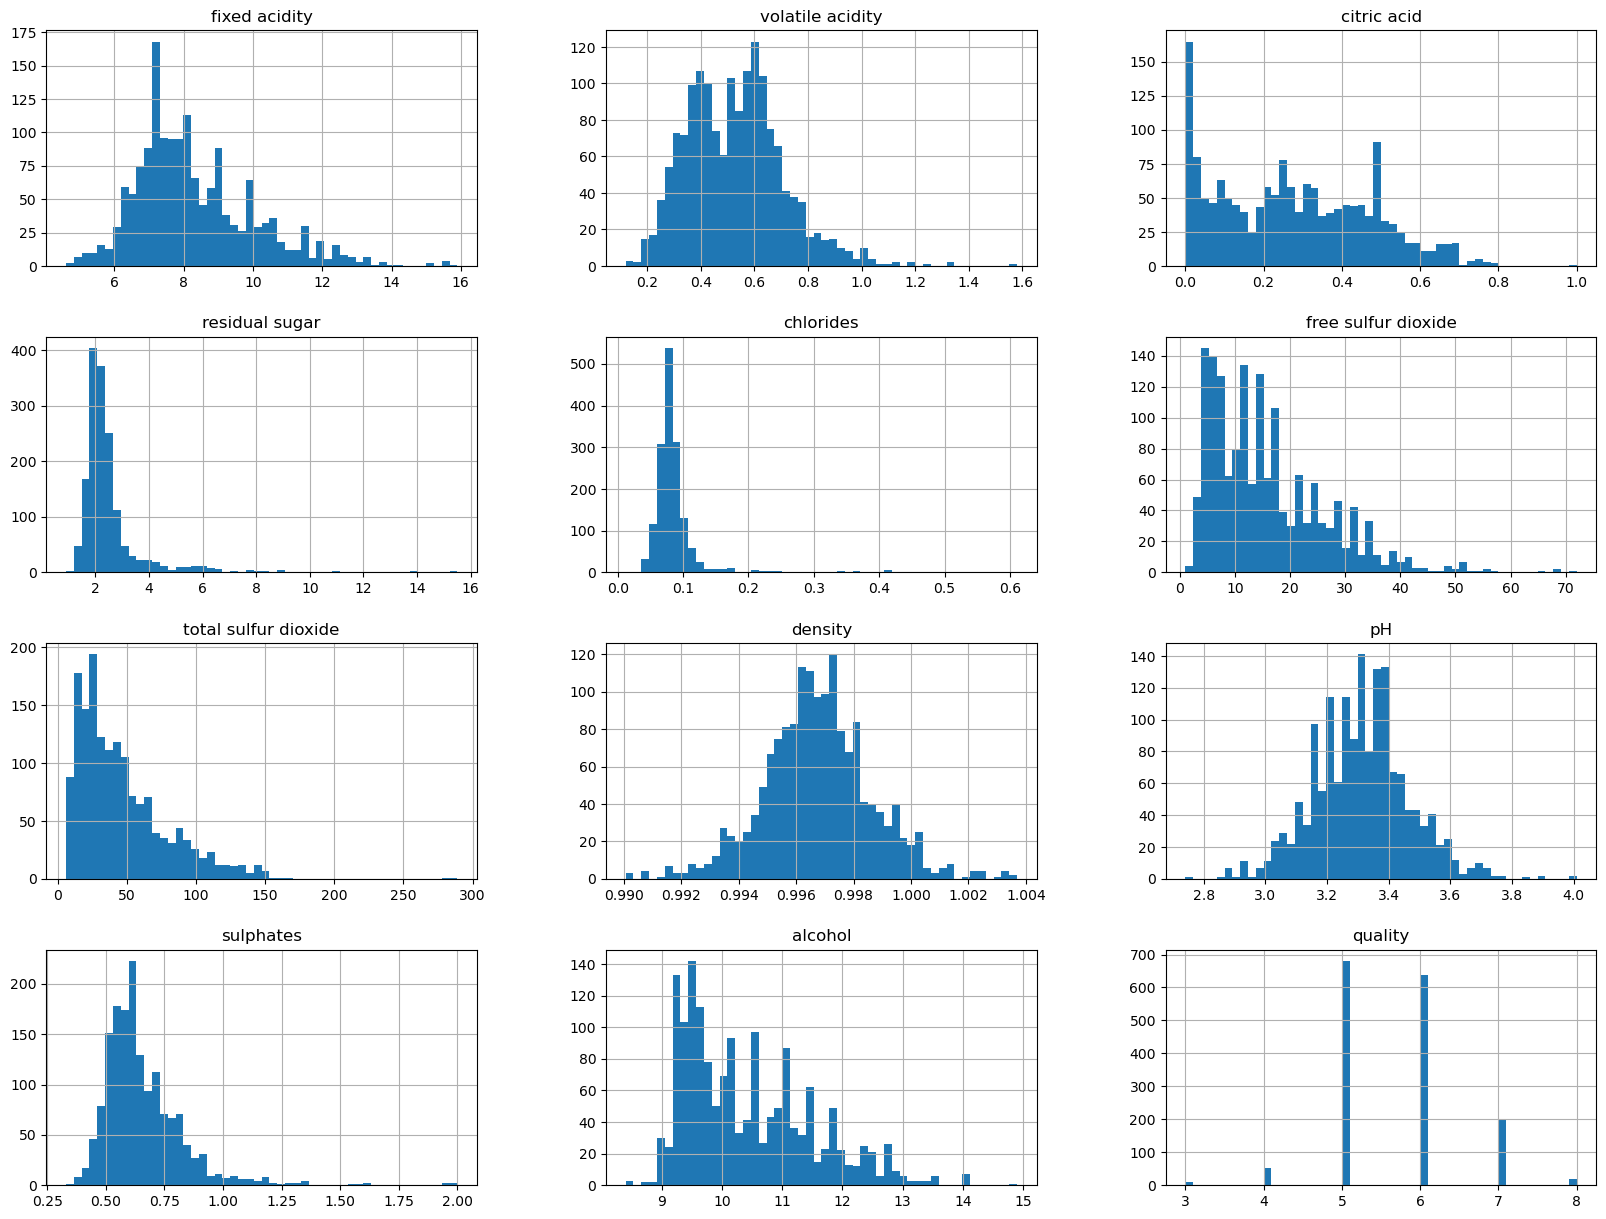

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [334]:
X = df[['alcohol','pH','density','citric acid',]]
y = df[['quality']]

In [335]:
X = pd.get_dummies(X)

In [336]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [337]:
X_train, X_test, y_train, y_test = X[:1299], X[1299:1599], y[:1299], y[1299:1599]

In [338]:
y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

In [339]:
y_train_1

quality
0       False
1       False
2       False
3       False
4       False
...       ...
1294    False
1295    False
1296    False
1297    False
1298    False

[1299 rows x 1 columns]

In [340]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LogisticRegression

In [341]:
LR_X_train = X_train
LR_y_train = y_train

In [342]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(LR_X_train, LR_y_train)

D:\programs\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\programs\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [343]:
from sklearn.model_selection import cross_val_score
cross_val_score(LR, LR_X_train, LR_y_train, cv=3, scoring="accuracy")

D:\programs\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\programs\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\programs\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

array([0.52193995, 0.52655889, 0.57274827])

# Support Vector Machines

In [344]:
SVC_X_train = X_train
SVC_y_train = y_train

In [345]:
from sklearn.svm import SVC
SVC = SVC(kernel='linear')
SVC.fit(SVC_X_train, SVC_y_train)

D:\programs\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [346]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC, SVC_X_train, SVC_y_train, cv=3, scoring="accuracy")

D:\programs\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\programs\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\programs\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.48729792, 0.53117783, 0.59353349])

# RandomForestClassifier

In [347]:
RFC_X_train = X_train
RFC_y_train = y_train

In [348]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(RFC_X_train, RFC_y_train)

D:\programs\anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [349]:
from sklearn.model_selection import cross_val_score
cross_val_score(RFC, RFC_X_train, RFC_y_train, cv=3, scoring="accuracy")

D:\programs\anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\programs\anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\programs\anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([0.48498845, 0.48729792, 0.44572748])

# GradientBoostingClassifier

In [350]:
GBC_X_train = X_train
GBC_y_train = y_train

In [351]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(GBC_X_train, GBC_y_train)

D:\programs\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [352]:
from sklearn.model_selection import cross_val_score
cross_val_score(GBC, GBC_X_train, GBC_y_train, cv=3, scoring="accuracy")

D:\programs\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\programs\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\programs\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.46189376, 0.47344111, 0.48036952])

# KNeighborsClassifier

In [353]:
KNN_X_train = X_train
KNN_y_train = y_train

In [354]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(KNN_X_train, KNN_y_train)

D:\programs\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [355]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNN, KNN_X_train, KNN_y_train, cv=3, scoring="accuracy")

D:\programs\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\programs\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\programs\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0.48960739, 0.4965358 , 0.47113164])

In [356]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [357]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(LR_X_train, X_train, y_train_1, cv=3)

TypeError: Cannot clone object '      alcohol    pH  density  citric acid
0         9.4  3.51  0.99780         0.00
1         9.8  3.20  0.99680         0.00
2         9.8  3.26  0.99700         0.04
3         9.8  3.16  0.99800         0.56
4         9.4  3.51  0.99780         0.00
...       ...   ...      ...          ...
1294     10.9  3.29  0.99638         0.10
1295      9.5  3.20  0.99558         0.00
1296      9.5  3.20  0.99558         0.00
1297     12.1  3.35  0.99323         0.14
1298     12.2  3.45  0.99191         0.00

[1299 rows x 4 columns]' (type <class 'pandas.core.frame.DataFrame'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [382]:
DT_X_train = X_train
DT_y_train = y_train

In [383]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(DT_X_train, DT_y_train)

DecisionTreeClassifier()

In [384]:
from sklearn.model_selection import cross_val_score
cross_val_score(DT, DT_X_train, DT_y_train, cv=3, scoring="accuracy")

array([0.6997319 , 0.69705094, 0.73726542])

In [385]:
def classify_quality(quality):
    if quality <= 5:
        return 'Low'
    elif quality == 6:
        return 'Medium'
    elif quality >= 7:
        return 'High'

In [386]:
df['quality_category'] = df['quality'].apply(classify_quality)

In [387]:
X = df.drop(['quality', 'quality_category'], axis=1)
y = df['quality_category']

In [388]:
X_train, X_test, y_train, y_test = X[:1299], X[1299:1599], y[:1299], y[1299:1599]

# DecisionTreeClassifier

In [389]:
DT_X_train = X_train
DT_y_train = y_train

In [390]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(DT_X_train, DT_y_train)

DecisionTreeClassifier()

In [391]:
from sklearn.model_selection import cross_val_score
cross_val_score(DT, DT_X_train, DT_y_train, cv=3, scoring="accuracy")

array([0.52655889, 0.45034642, 0.47575058])

# LogisticRegression

In [392]:
LR_X_train = X_train
LR_y_train = y_train

In [393]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(LR_X_train, LR_y_train)

D:\programs\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [394]:
from sklearn.model_selection import cross_val_score
cross_val_score(LR, LR_X_train, LR_y_train, cv=3, scoring="accuracy")

D:\programs\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\programs\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

array([0.56812933, 0.56812933, 0.58891455])

# Support Vector Machines

In [395]:
SVC_X_train = X_train
SVC_y_train = y_train

In [396]:
from sklearn.svm import SVC
SVC = SVC(kernel='linear')
SVC.fit(SVC_X_train, SVC_y_train)

SVC(kernel='linear')

In [397]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC, SVC_X_train, SVC_y_train, cv=3, scoring="accuracy")

array([0.58198614, 0.57505774, 0.61200924])

# RandomForestClassifier

In [398]:
RFC_X_train = X_train
RFC_y_train = y_train

In [399]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(RFC_X_train, RFC_y_train)

RandomForestClassifier()

In [400]:
from sklearn.model_selection import cross_val_score
cross_val_score(RFC, RFC_X_train, RFC_y_train, cv=3, scoring="accuracy")

array([0.56351039, 0.57274827, 0.56120092])

# GradientBoostingClassifier

In [401]:
GBC_X_train = X_train
GBC_y_train = y_train

In [402]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(GBC_X_train, GBC_y_train)

GradientBoostingClassifier()

In [403]:
from sklearn.model_selection import cross_val_score
cross_val_score(GBC, GBC_X_train, GBC_y_train, cv=3, scoring="accuracy")

array([0.58660508, 0.5704388 , 0.59122402])

# KNeighborsClassifier

In [404]:
KNN_X_train = X_train
KNN_y_train = y_train

In [405]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(KNN_X_train, KNN_y_train)

KNeighborsClassifier()

In [406]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNN, KNN_X_train, KNN_y_train, cv=3, scoring="accuracy")

array([0.49884527, 0.43648961, 0.44803695])

# Проверяем, является ли эта модель лучшей

In [407]:
def classify_quality(quality):
    if quality <= 5:
        return 'Low'
    elif quality == 6:
        return 'Medium'
    elif quality >= 7:
        return 'High'

In [408]:
df['quality_category'] = df['quality'].apply(classify_quality)

In [409]:
X = df.drop(['quality', 'quality_category'], axis=1)
y = df['quality_category']

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [411]:
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

TypeError: 'SVC' object is not callable

In [412]:
# models = [
#     ('DT', DecisionTreeClassifier(random_state=42)),
#     ('LR', LogisticRegression(random_state=42)),
#     ('SVM', SVC(random_state=42)),
#     ('RFC', RandomForestClassifier(random_state=42)),
#     ('GBC', GradientBoostingClassifier(random_state=42))
# #      ('KNN', KNeighborsClassifier(random_state=42))
# ]

In [413]:
best_model = None
best_accuracy = 0

In [414]:
for name, model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy:", accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

Decision Tree Accuracy: 0.6041666666666666
Random Forest Accuracy: 0.6854166666666667
SVM Accuracy: 0.5125


In [415]:
print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)

Best Model: RandomForestClassifier(random_state=42)
Best Accuracy: 0.6854166666666667


# Создаем и тестируем несколько моделей

In [416]:
from sklearn.svm import SVC

In [417]:
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42))
]

In [418]:
best_model = None
best_accuracy = 0

In [419]:
for name, model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy:", accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

Decision Tree Accuracy: 0.6041666666666666
Random Forest Accuracy: 0.6854166666666667
SVM Accuracy: 0.5125


In [420]:
print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)

Best Model: RandomForestClassifier(random_state=42)
Best Accuracy: 0.6854166666666667


# XGBClassifier

In [421]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [474]:
def classify_quality(quality):
    if quality <= 5:
        return 'Low'
#     if quality >= 6:
#         return 'Medium'
    elif quality >= 6:
        return 'High'

In [475]:
df['quality_category'] = df['quality'].apply(classify_quality)

In [476]:
X = df.drop(['quality', 'quality_category'], axis=1)
y = df['quality_category']

In [477]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [478]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [479]:
xgb_model = XGBClassifier(random_state=42)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
xgb_accuracy = xgb_scores.mean()

In [480]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [481]:
xgb_test_accuracy = xgb_model.score(X_test, y_test)

In [482]:
print("XGBoost Model Accuracy:", xgb_accuracy)
print("XGBoost Test Accuracy:", xgb_test_accuracy)

XGBoost Model Accuracy: 0.7819907110826394
XGBoost Test Accuracy: 0.7958333333333333
